# Lesson 3 Assignment - Monty Hall Simulation
## Author - 

### Instructions
Simulate the conditional probabilities of the distributions for winning a car vs. a goat for the Monty Hall Problem that includes the following:
1. the cases for switching or not switching
2. histograms and summary statistics (at least mean and variance) of the results for winning the car or a goat for both strategies: switching or not switching
3. comparison of the cases to determine the best strategy
4. recommended strategy



#### Note: 
Please clearly outline the results and your recommendation with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
# Import libraries
from __future__ import division 

import numpy as np
import pandas as pd
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

Monty Hall problem, three doors, one has car, other two have goat.

Pick a door, one of the other two doors wiil be open by Monty.You can switch the door or not, rule is if you open car door, you win. 

For all calculation for winning means you open the car door!

In [2]:
def door(switch):
    
    #car is located randomly in door 1, 2, 3
    car_door = random.randint(1,3)
    
    #randomly pick a door
    pick = random.randint(1,3)    
    
    #The case of switch door
    if switch:
        if pick != car_door:
            # if initial pick is not the car door, Monty can only 
            # open the remained goat door, that means the switching
            # to the car door is happening for sure.
            new_pick = car_door
        else:
            # if initial pick is the car door, Monty can open one of two goat
            # door, it's a random choice problem for picking one out of two 
            # goat door
            lst = np.arange(1,4).tolist()
            new =[i for i in lst if i is not pick]
            new_pick = random.choice(new)
            
        result = (new_pick == car_door)
        
    else:
        result = (pick == car_door)
    
    return result

In [3]:
# run n times of the game 'door'
def simulate(switch, n):
    win = 0
    for i in range(n):
        if door(switch):
            win +=1
    #returning the total winning times out of n trials
    return win

In [4]:
#set up the number of trials
n = [1,5,10,15,20,30,40,50,60,70,80,100,300,500,700,1000]
df= pd.DataFrame()
p_s =[]
p_ns= []

#loop through all trials, and calculate the winning probability 
for index, i in enumerate(n):
    p_switch = simulate(True, i) / i
    p_notswitch = simulate(False, i) / i
    
    p_s.append(p_switch)
    p_ns.append(p_notswitch)
    
df['Trials n'] = n
df['Winning Prob for switch'] = p_s
df['Winning Prob for not-switch'] = p_ns
df = df.round(2)
df

,Trials n,Winning Prob for switch,Winning Prob for not-switch
0,1,1.00,1.00
1,5,0.80,0.60
2,10,0.60,0.50
3,15,0.60,0.33
4,20,0.70,0.20
5,30,0.70,0.17
6,40,0.65,0.28
7,50,0.72,0.40
8,60,0.63,0.35
9,70,0.64,0.39


Table above shows winning probability for switching and not switching doors. Different trials have been performed from 1 to 1000. We can see that the winning probability for switch doors is approaching a theoretical value 2/3 (0.6667) when having more trials, while winning probability for not switch doors is approaching 1/3. Both observations agree with theoretical calculations.

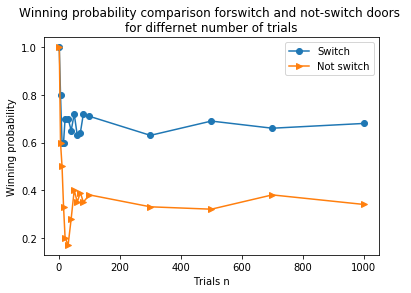

In [5]:
#create a line plots for both switch and not switch probability in various numbers of trials
plt.plot(df['Trials n'], df['Winning Prob for switch'], 
         marker = 'o',label='Switch')
plt.plot(df['Trials n'], df['Winning Prob for not-switch'], 
         marker = '>', label='Not switch')
plt.xlabel('Trials n')
plt.ylabel('Winning probability')
plt.title('Winning probability comparison for'
          'switch and not-switch doors \n'+
          'for differnet number of trials')
plt.legend();

In this line plot, we can more clearly see that winning probability for both scenarios are fluctuating when number of trials is small (<100). However, both probability are steady when you have a large amount of trials.And the winning probability for switch doors is higher than not switch doors scenario.

Next, let's explore probability of winning bahaves if we repeat 1000 trials 300 times.

In [6]:
# Define a function that can repeat n trials k times
def rep (k, n, switch):
    l = []
    for i in range(k):
        w = simulate(switch,n)/n
        l.append(w)
    #return the list of winning probability for each repetition
    return l

In [7]:
#simulating switching cases, 300 repetions, 1000 trials each time
sw_prob_rep = rep(300,1000, True)
#simulating not switching cases,300 repetions, 1000 trials each time
nsw_prob_rep = rep(300, 1000, False)

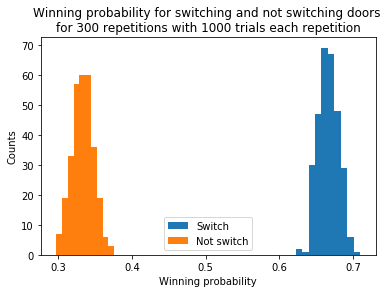

In [8]:
#create a histogram for both switch and not swich door cases for 300 repetitions
plt.hist(sw_prob_rep, label = 'Switch')
plt.hist(nsw_prob_rep, label ='Not switch')
plt.xlabel('Winning probability')
plt.ylabel('Counts')
plt.title('Winning probability for switching and not switching doors \n'+
         'for 300 repetitions with 1000 trials each repetition')
plt.legend();

Two histograms are plotting in one figure. Both are 'bell' shape alike. Winnning probability for switch case is way higher than not switch case. The mean and variance of each distribution are calculated below.

In [9]:
m_sw=np.mean(sw_prob_rep)
v_sw = np.var(sw_prob_rep)
print('For switching doors experiment in 300 repetitions,'
      'each repetition has 1000 trials, '
      'mean is %.2f, variance is %.2f.' %(m_sw, v_sw))

m_nsw=np.mean(nsw_prob_rep)
v_nsw = np.var(nsw_prob_rep)
print('For NOT switching doors experiment in 300 repetitions,'
      'each repetition has 1000 trials, '
      'mean is %.2f, variance is %.2f.' %(m_nsw, v_nsw))

For switching doors experiment in 300 repetitions,each repetition has 1000 trials, mean is 0.67, variance is 0.00.
For NOT switching doors experiment in 300 repetitions,each repetition has 1000 trials, mean is 0.33, variance is 0.00.


Statistics (mean and variance) have shown that the mean winning probability for switch door case is 0.67, with negligible variance, and the mean winning probability for NOT switch door case is 0.33, with negligible variance.
These values agree with theoretical calculations that in switch door cases, winning probability is 2/3 while in not switch door cases, winnning probability is 1/3.

Summary：

From both histogram and statistics, we can learn that winning proabbilty (0.67) is higher when switching doors compared to not switching doors (0.33). So in this game, switching door is recommended. 